Step 1: Importing librabries, modules and functions

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


Step 2: Loading the Data

In [6]:
# Load the data
df = pd.read_csv('heart.csv')
# Load the oxygen saturation dataset (df1)
df1= pd.read_csv('o2Saturation.csv')

# Display the first few rows of the heart dataset
df.head()
# Display the first few rows of the oxygen saturation dataset
#df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Step 3: EDA & Data Visualization

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


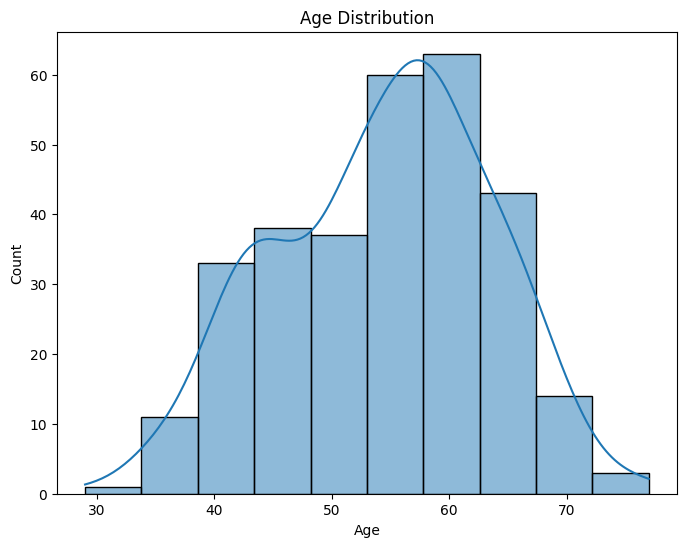

In [7]:
# Check the data types of columns
df.dtypes

# Check for missing values
df.isnull().sum()

# Plotting age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Step 4: Data Prepocessing - Handling missing values, pipelines, encoding categorical columns

In [8]:
# Split the data into features (X) and target (y)
X = df.drop('output', axis=1)
y = df['output']

# Define feature columns based on your preferences
features = ['thall', 'caa', 'cp', 'oldpeak', 'exng', 'chol', 'thalachh']
X = X[features]

# Create transformers for preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Step 5: Building & Training Model with XGBoost Classifier

In [9]:
# Build the XGBoost Classifier model
model = XGBClassifier(learning_rate=0.05, n_estimators=190, max_depth=6, random_state=0)

# Create a pipeline for encoding and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Step 6 : Making Prediction and Evaluating Model

In [10]:
# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
auc = roc_auc_score(y_test, y_pred)

print('ACCURACY:', accuracy)
print('AUC score:', auc)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


ACCURACY: 83.60655737704919
AUC score: 0.8300653594771241


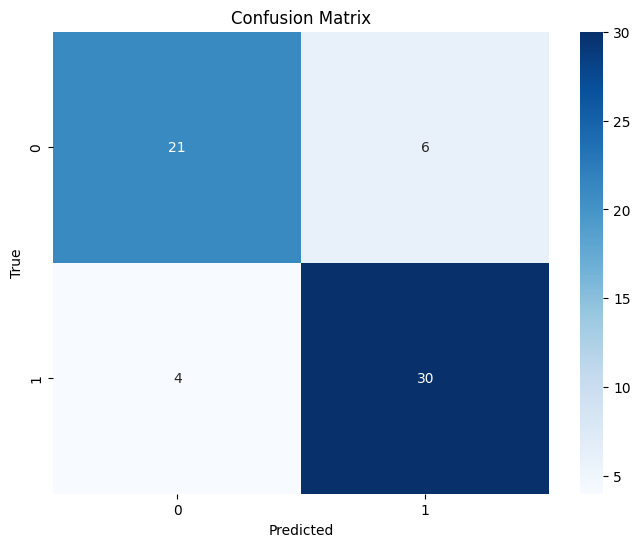

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)
